In [15]:
# Cell 1: Introduction
# This notebook provides a comprehensive analysis of the Pima Indians Diabetes dataset.

# Cell 2: Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from scipy.stats import zscore

# Configure plots
sns.set(style="whitegrid")

# Cell 3: Load Dataset and Initial Inspection
file_path = 'diabetes.csv'
diabetes_df = pd.read_csv(file_path)
diabetes_df.head()
print(diabetes_df.info())
print(diabetes_df.describe())
print(diabetes_df.isnull().sum())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std    

C:\Users\Omar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Omar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Omar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Omar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

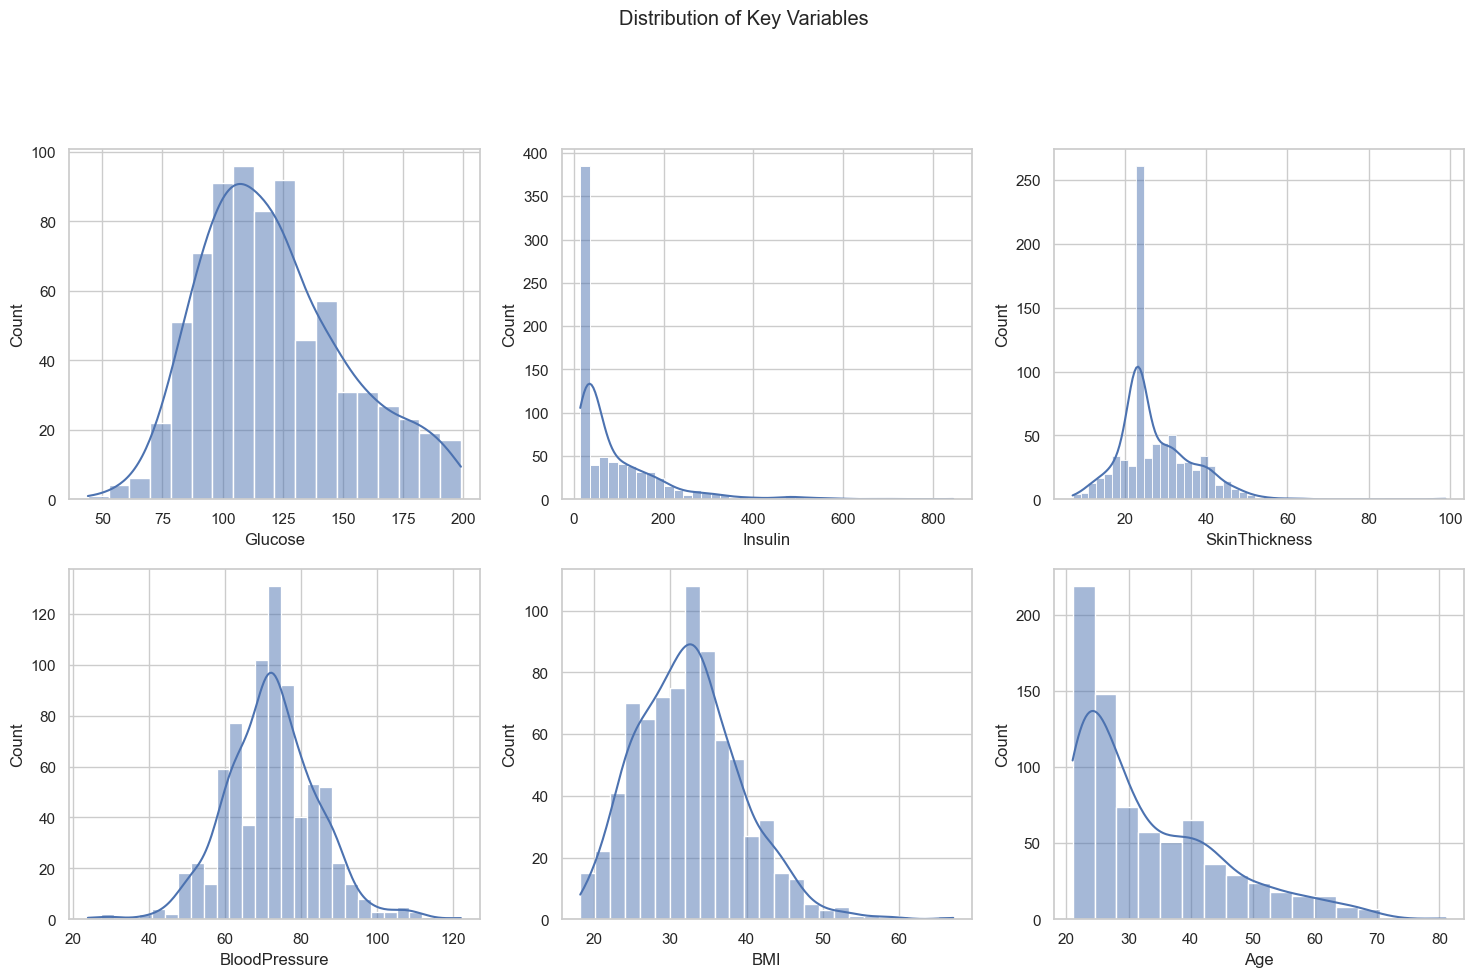

In [31]:
# Cell 4: Exploratory Data Analysis (EDA)
# Plot distributions of key variables
fig, axs = plt.subplots(2, 3, figsize=(18, 10))
sns.histplot(diabetes_df['Glucose'], kde=True, ax=axs[0, 0])
sns.histplot(diabetes_df['Insulin'], kde=True, ax=axs[0, 1])
sns.histplot(diabetes_df['SkinThickness'], kde=True, ax=axs[0, 2])
sns.histplot(diabetes_df['BloodPressure'], kde=True, ax=axs[1, 0])
sns.histplot(diabetes_df['BMI'], kde=True, ax=axs[1, 1])
sns.histplot(diabetes_df['Age'], kde=True, ax=axs[1, 2])
plt.suptitle('Distribution of Key Variables', y=1.02)
plt.show()





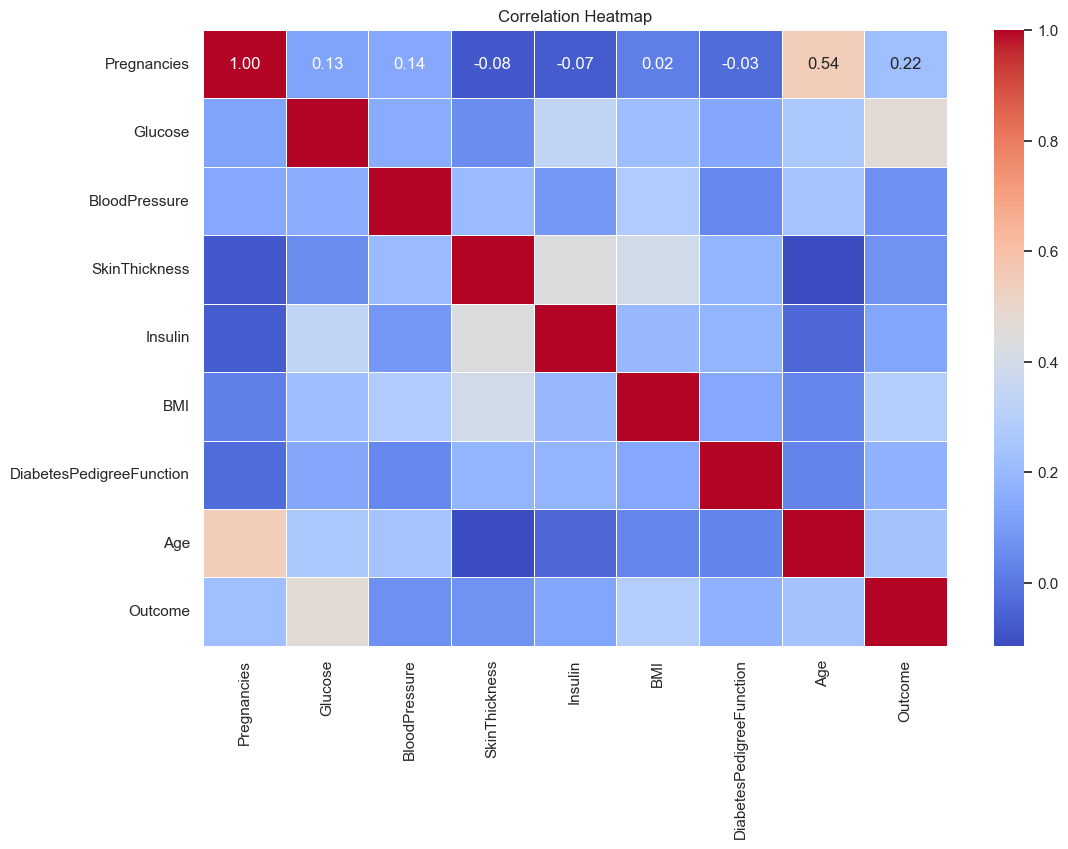

In [17]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = diabetes_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()



C:\Users\Omar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Omar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Omar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Omar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

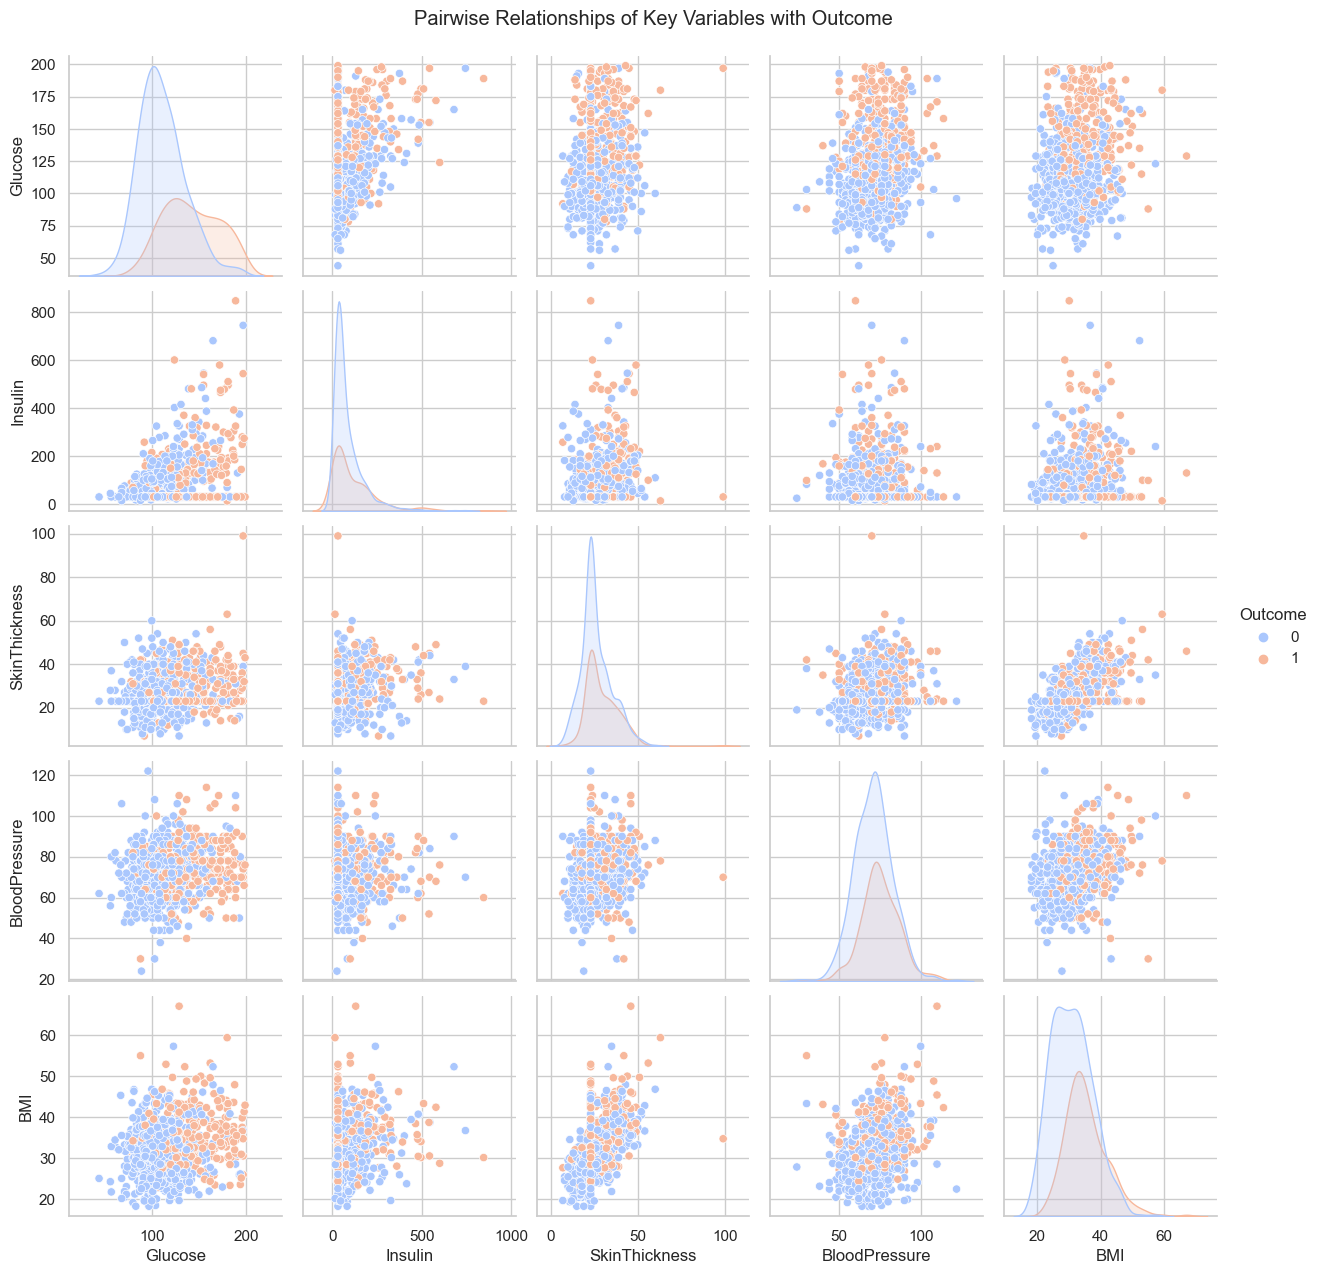

In [35]:
# Pairwise relationships
sns.pairplot(diabetes_df, vars=['Glucose', 'Insulin', 'SkinThickness', 'BloodPressure', 'BMI'], hue='Outcome', palette='coolwarm')
plt.suptitle('Pairwise Relationships of Key Variables with Outcome', y=1.02)
plt.show()

In [19]:
# Cell 5: Data Preprocessing
columns_to_impute = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
diabetes_df[columns_to_impute] = diabetes_df[columns_to_impute].replace(0, diabetes_df[columns_to_impute].median())

X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



Number of outliers detected with Z-Score: 56
Number of outliers detected with Isolation Forest: 39
Number of outliers detected with LOF: 39


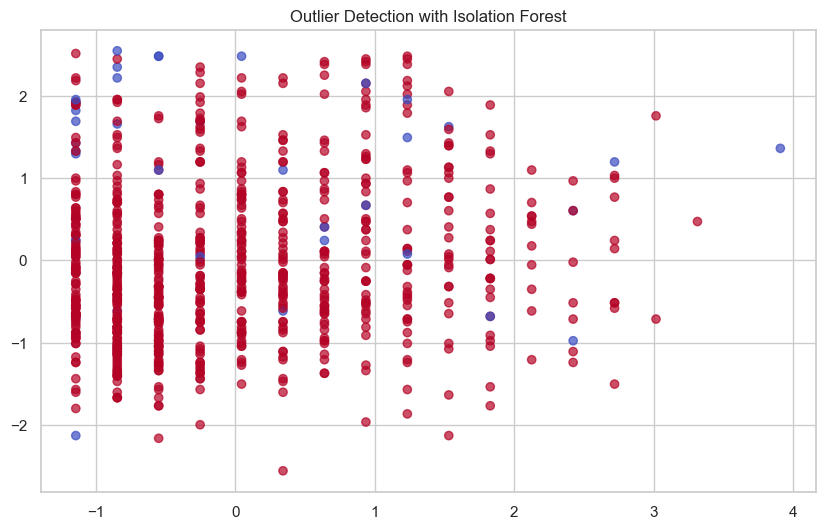

In [20]:
# Cell 6: Outlier Detection
z_scores = np.abs(zscore(X_scaled))
outliers_zscore = np.where(z_scores > 3)

iso_forest = IsolationForest(contamination=0.05, random_state=42)
outliers_iso = iso_forest.fit_predict(X_scaled)

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
outliers_lof = lof.fit_predict(X_scaled)

print("Number of outliers detected with Z-Score:", len(outliers_zscore[0]))
print("Number of outliers detected with Isolation Forest:", sum(outliers_iso == -1))
print("Number of outliers detected with LOF:", sum(outliers_lof == -1))

plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=outliers_iso, cmap='coolwarm', alpha=0.7)
plt.title('Outlier Detection with Isolation Forest')
plt.show()



Evaluating KNN...

Model: KNN
Accuracy: 0.7142857142857143
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.79      0.78       151
           1       0.59      0.56      0.58        80

    accuracy                           0.71       231
   macro avg       0.68      0.68      0.68       231
weighted avg       0.71      0.71      0.71       231



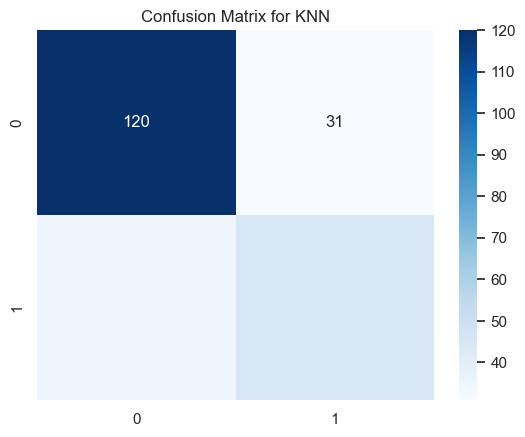

Evaluating SVM...

Model: SVM
Accuracy: 0.7359307359307359
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       151
           1       0.63      0.59      0.61        80

    accuracy                           0.74       231
   macro avg       0.71      0.70      0.70       231
weighted avg       0.73      0.74      0.73       231



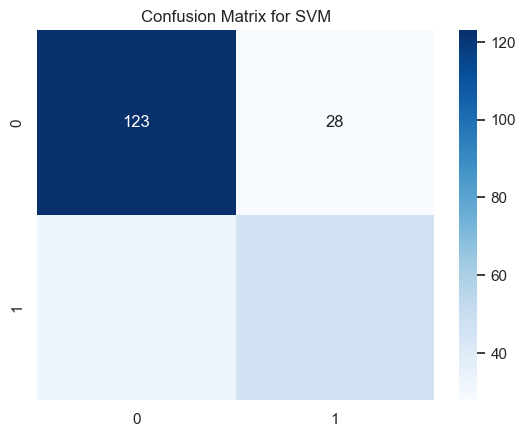

Evaluating ANN...


C:\Users\Omar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(



Model: ANN
Accuracy: 0.7445887445887446
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.81      0.81       151
           1       0.63      0.62      0.63        80

    accuracy                           0.74       231
   macro avg       0.72      0.72      0.72       231
weighted avg       0.74      0.74      0.74       231



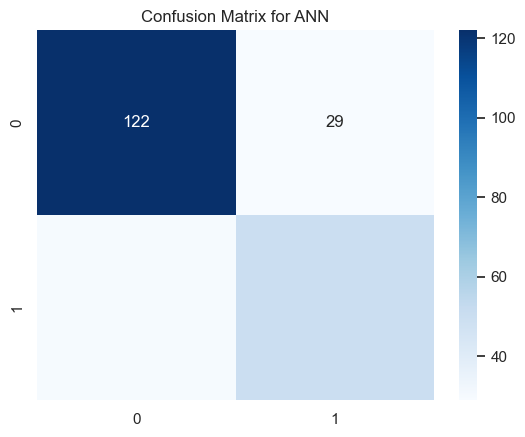

In [21]:
# Cell 7: Machine Learning Models
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

models = {
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'SVM': SVC(kernel='linear', C=1),
    'ANN': MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, activation='relu', solver='adam')
}

results = {}
for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    results[model_name] = {
        'accuracy': accuracy,
        'report': report,
        'confusion_matrix': conf_matrix
    }
    
    print(f"\nModel: {model_name}")
    print(f"Accuracy: {accuracy}")
    print("Classification Report:")
    print(report)
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues')
    plt.title(f"Confusion Matrix for {model_name}")
    plt.show()



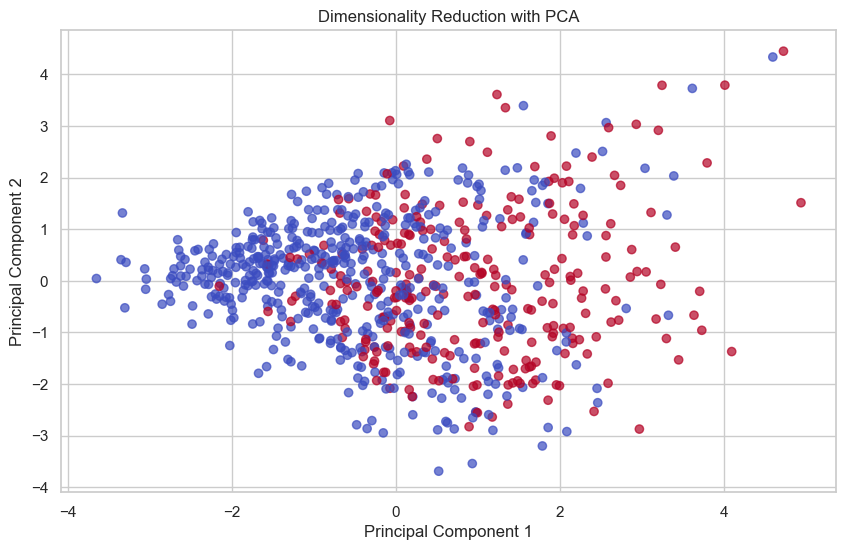

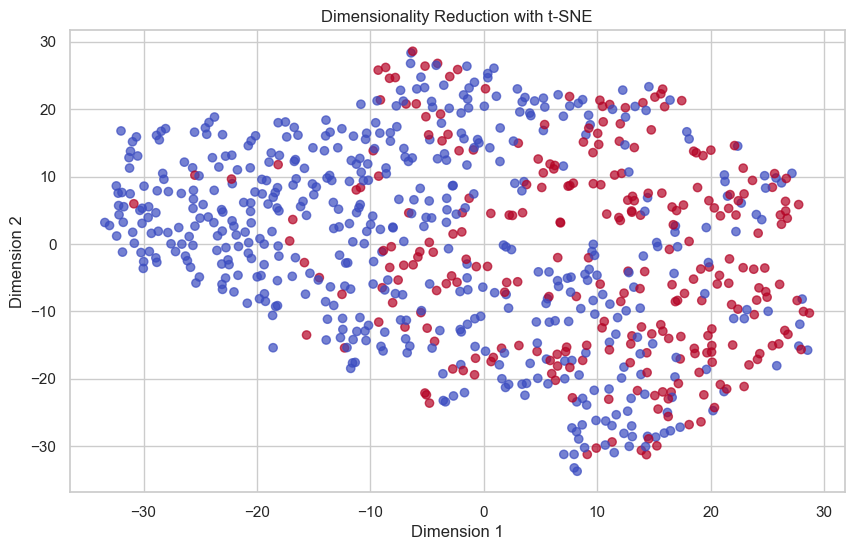

C:\Users\Omar\anaconda3\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


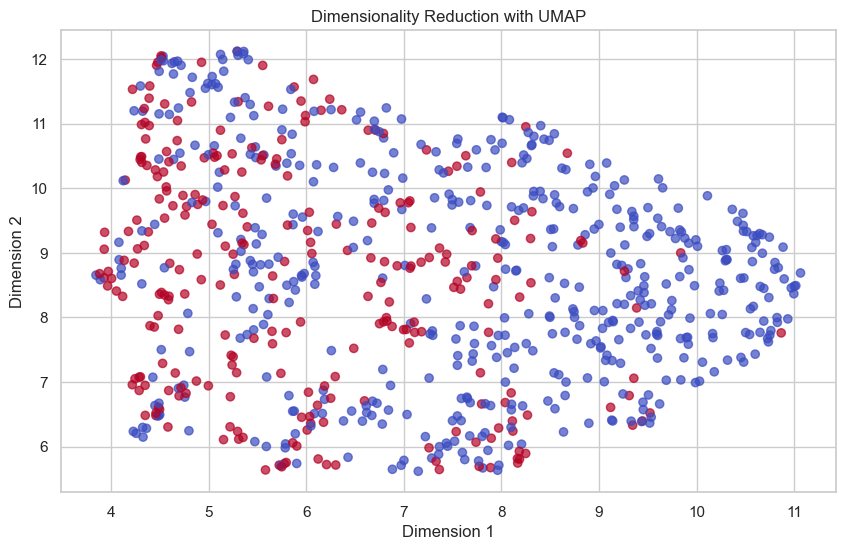

In [22]:
# Cell 8: Dimensionality Reduction and Clustering
# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', alpha=0.7)
plt.title('Dimensionality Reduction with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='coolwarm', alpha=0.7)
plt.title('Dimensionality Reduction with t-SNE')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

# UMAP
umap_model = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap='coolwarm', alpha=0.7)
plt.title('Dimensionality Reduction with UMAP')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

# Cell 9: Conclusion
# Summarize the analysis and findings.
